In [78]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import numba

In [79]:
size = 1000
spinDensity = 1
state = np.random.choice([-spinDensity, spinDensity], size=(size, size))
jVal = 10
BVal = 10
hVal = 1
index = 0

In [80]:
@numba.njit(numba.int32(numba.int32[:,:], numba.int32))
def energy(state,jVal):
    h_influence = 0
    h_spin = 0

    for x in range(size):
        for y in range(size):
            h_influence += -jVal * state[x, y] * ((state[x][y-1] if y-1 >= 0 else 0) + 
                                                             (state[x][y+1] if y+1 < size else 0) +
                                                             (state[x-1][y] if x-1 >= 0 else 0) +
                                                             (state[x+1][y] if x+1 < size else 0))
            h_spin += -(hVal * state[x, y])

    #print(f'{h_influence = }, {h_spin = }, {h_spin + h_influence = }') 
    return h_influence + h_spin

@numba.njit(numba.int32(numba.int32[:,:], numba.int32, numba.int32)) 
#@numba.njit
def step(state,BVal,index):
    e1 = energy(state,jVal)
    x = random.randint(0,len(state)-1)
    y = random.randint(0,len(state)-1)
    
    state[x,y] = -state[x,y]
    e2 = energy(state,jVal)
    
    dE = e2 - e1
    if dE > 0:
        pr = random.random()
        if pr < math.e ** (-dE*BVal):
            index +=1
            plt.imshow(state)
        else:
            state[x,y] = -state[x,y]
    else:
        index +=1
        plt.imshow(state)
    return 0


╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ C:\Users\Widokowa\AppData\Local\Temp\ipykernel_16232\2895652250.py:19 in <module>         │
│                                                                                           │
│ [Errno 2] No such file or directory:                                                      │
│ 'C:\\Users\\Widokowa\\AppData\\Local\\Temp\\ipykernel_16232\\2895652250.py'               │
│ C:\Users\Widokowa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p │
│ 0\LocalCache\local-packages\Python39\site-packages\numba\core\decorators.py:219 in        │
│ wrapper                                                                                   │
│                                                                                           │
│   216 │   │   │   from numba.core import typeinfer                                        │
│   217 │   │   │   with typeinfer.register_dispatcher(disp):                               │
│   218 │   │   │   │   for sig in sigs:                                                    │
│ ❱ 219 │   │   │   │   │   disp.compile(sig)                                               │
│   220 │   │   │   │   disp.disable_compile()                                              │
│   221 │   │   return disp                                                                 │
│   222                                                                                     │
│                                                                                           │
│ C:\Users\Widokowa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p │
│ 0\LocalCache\local-packages\Python39\site-packages\numba\core\dispatcher.py:965 in        │
│ compile                                                                                   │
│                                                                                           │
│    962 │   │   │   │   )                                                                  │
│    963 │   │   │   │   with ev.trigger_event("numba:compile", data=ev_details):           │
│    964 │   │   │   │   │   try:                                                           │
│ ❱  965 │   │   │   │   │   │   cres = self._compiler.compile(args, return_type)           │
│    966 │   │   │   │   │   except errors.ForceLiteralArg as e:                            │
│    967 │   │   │   │   │   │   def folded(args, kws):                                     │
│    968 │   │   │   │   │   │   │   return self._compiler.fold_argument_types(args,        │
│                                                                                           │
│ C:\Users\Widokowa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p │
│ 0\LocalCache\local-packages\Python39\site-packages\numba\core\dispatcher.py:129 in        │
│ compile                                                                                   │
│                                                                                           │
│    126 │   │   if status:                                                                 │
│    127 │   │   │   return retval                                                          │
│    128 │   │   else:                                                                      │
│ ❱  129 │   │   │   raise retval                                                           │
│    130 │                                                                                  │
│    131 │   def _compile_cached(self, args, return_type):                                  │
│    132 │   │   key = tuple(args), return_type                                             │
│                                                                                           │
│ C:\Users\Widokowa\AppData\Local\Packages\PythonSof

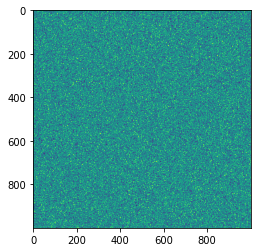

In [81]:
for i in range(100):
    step(state,BVal,index)
#plt.show()